In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from geopy.distance import vincenty
#import geopy
import scipy as sp



In [174]:
df=pd.read_csv('berlin.csv')

/Users/kristof/anaconda3/envs/myPython/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (38,43,61,62,84,85,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [175]:
print(df.shape)

(24586, 106)

In [176]:
df=df.loc[df['availability_365']>0]
#df=df.loc[df['number_of_reviews']>0]

In [177]:
len(df)

12479

In [178]:
df['price']

0         $21.00
1         $90.00
2         $28.00
3        $125.00
4         $33.00
          ...   
24581     $77.00
24582    $140.00
24583     $20.00
24584     $35.00
24585     $35.00
Name: price, Length: 12479, dtype: object

In [179]:
#for i in df.columns:
    #print(i)

In [180]:
df['price']=df['price'].apply(lambda x: x.split('$')[1])
df['price']=df['price'].apply(lambda x: x.replace(',', ''))
df['price']=df['price'].astype(float)


In [181]:
df['price'].describe()

count    12479.000000
mean        91.275262
std        289.756243
min          0.000000
25%         40.000000
50%         59.000000
75%         90.000000
max       8983.000000
Name: price, dtype: float64

In [182]:
df=df[df['price']<np.percentile(df['price'], 98)]

In [183]:
df=df[df['price']>0]

In [184]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

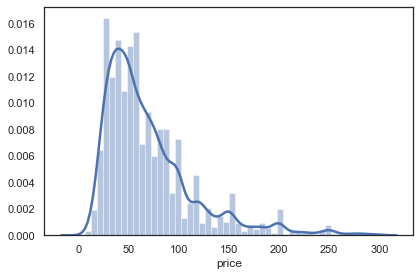

In [187]:
sns.distplot(df['price'])
plt.tight_layout()
plt.savefig('hist.pdf')
plt.show()

In [188]:
np.log(df['price'])

0        3.044522
1        4.499810
2        3.332205
3        4.828314
4        3.496508
           ...   
24581    4.343805
24582    4.941642
24583    2.995732
24584    3.555348
24585    3.555348
Name: price, Length: 12217, dtype: float64

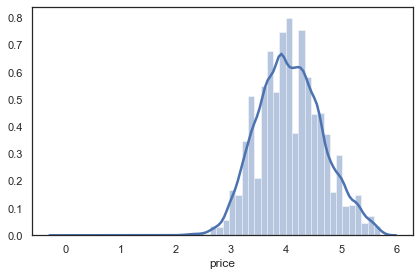

In [189]:
sns.distplot(np.log(df['price']))
plt.tight_layout()
plt.savefig('hist_log.pdf')
plt.show()

In [193]:
df['city']='Berlin'

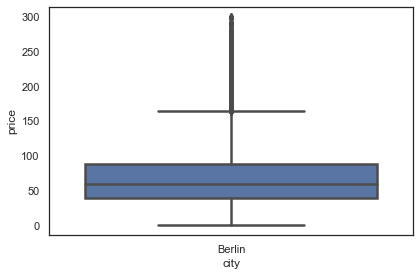

In [194]:
ax = sns.boxplot(x="city", y="price", data=df)
plt.tight_layout()
plt.savefig('box.pdf')

In [195]:
apart=df[df['room_type']=='Entire home/apt']
p_room=df[df['room_type']=='Private room']
s_room=df[df['room_type']=='Shared room']
#hotel=df[df['room_type']=='Hotel room']

In [196]:
colors = ['#0093ED', '#6F798D', '#FF002D', '#56203D', '#F4DBD8']


In [197]:
print(len(apart))
print(len(s_room))
print(len(p_room))
#print(len(hotel))

6791
180
5052


In [198]:
colors = ['#0093ED', '#6F798D', '#FF002D', '#56203D', '#F4DBD8']

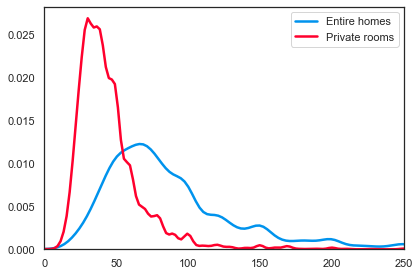

In [199]:
apart=df[df['room_type']=='Entire home/apt']
p_room=df[df['room_type']=='Private room']
s_room=df[df['room_type']=='Shared room']


sns.set(style="white")
sns.set_context(rc={"lines.linewidth": 2.5})
sns.kdeplot(apart['price'], label='Entire homes', color=colors[0])
sns.kdeplot(p_room['price'], label='Private rooms', color=colors[2])

#sns.kdeplot(s_room['realSum'], label='Hostels', color=colors[2])

#sns.kdeplot(air_wd['realSum'], label='Airbnb', color=colors[2])
plt.xlim(0, 250)

plt.tight_layout()
plt.savefig('kde.pdf')
plt.show()


In [200]:
print(np.median(apart['price']))

75.0


In [201]:
print(np.median(p_room['price']))

40.0


In [202]:
airbnb=apart.append(p_room)

In [203]:
airbnb['room_type'].unique()

array(['Entire home/apt', 'Private room'], dtype=object)

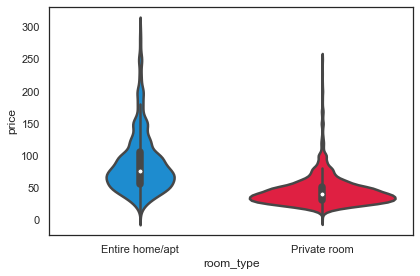

In [204]:
x = sns.violinplot(x="room_type",
                   y="price", 
                   data=airbnb, 
                  palette={'Entire home/apt': "#0093ED", 'Private room': "#FF002D"})
plt.tight_layout()
plt.savefig('violinplot.pdf')

In [167]:
df['city']='Berlin'

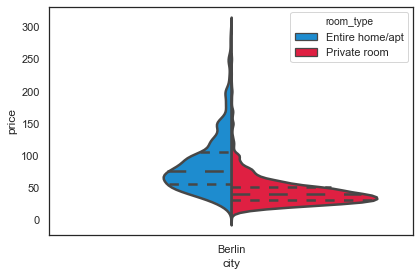

In [205]:
x = sns.violinplot(x='city',
                hue="room_type",
                   y="price",
                   split=True,
                   #hue='room_type',
                   data=airbnb,
                   inner="quart",
                  palette={'Entire home/apt': "#0093ED", 'Private room': "#FF002D"})
plt.tight_layout()
plt.savefig('violinplot_2.pdf')

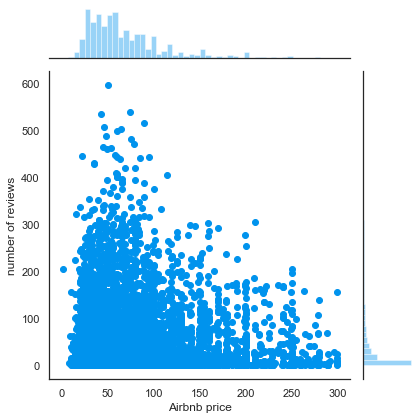

In [211]:
ax=sns.jointplot(df['price'], df['number_of_reviews'], color='#0093ED' ).set_axis_labels("Airbnb price", "number of reviews")
#ax.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(100))
#ax.annotate(sp.stats.pearsonr)
#ax.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(100))
#plt.savefig('pricereg2.pdf')

#plt.savefig('bookingvsairbnreg.pdf')
plt.tight_layout()
plt.savefig('jointplot.pdf')


/Users/kristof/anaconda3/envs/myPython/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


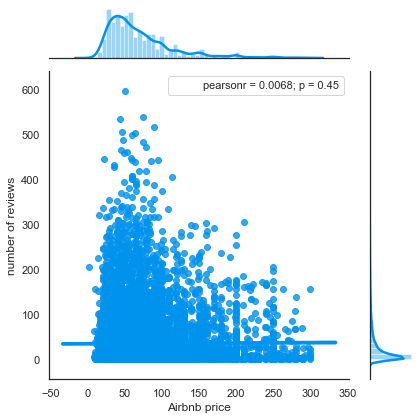

In [212]:
ax=sns.jointplot(df['price'], df['number_of_reviews'], color='#0093ED', kind='reg').set_axis_labels("Airbnb price", "number of reviews")
#ax.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.annotate(sp.stats.pearsonr)
#ax.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(100))
#plt.savefig('pricereg2.pdf')

#plt.savefig('bookingvsairbnreg.pdf')
plt.tight_layout()
plt.savefig('jointplot_2.pdf')

/Users/kristof/anaconda3/envs/myPython/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


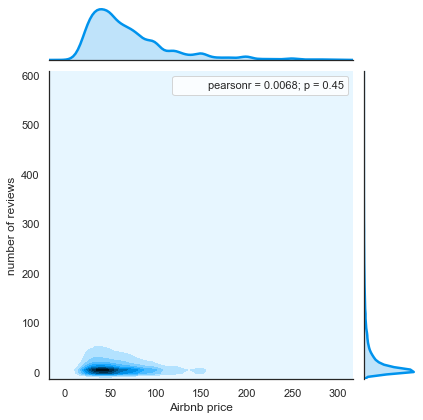

<Figure size 432x288 with 0 Axes>

In [172]:
ax=sns.jointplot(df['price'], df['number_of_reviews'], color='#0093ED', kind='kde').set_axis_labels("Airbnb price", "number of reviews")
#ax.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.annotate(sp.stats.pearsonr)
#ax.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(100))
#plt.savefig('pricereg2.pdf')

#plt.savefig('bookingvsairbnreg.pdf')
plt.show()

plt.tight_layout()




In [ ]:
df

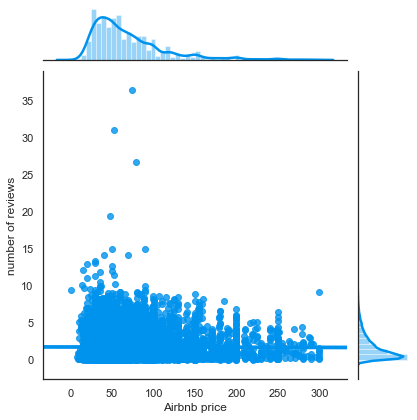

In [171]:
ax=sns.jointplot(df['price'], df['reviews_per_month'], color='#0093ED', kind='reg').set_axis_labels("Airbnb price", "number of reviews")

In [165]:
df['bedrooms']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
24581    0.0
24582    2.0
24583    1.0
24584    1.0
24585    1.0
Name: bedrooms, Length: 12217, dtype: float64

In [92]:
#airbnb['list']

In [144]:
for i in airbnb.columns:
       print(i)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [98]:
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.set(font_scale=2)
sns.set_style('white')
#fig = plt.figure(figsize=(24,18))
#fig = plt.figure()

#ax1=fig.add_subplot(2,2,1)

north = 52.675444
south = 52.342806
west = 13.088435
east = 13.760687

x = east - west
y = north - south


mid_point = geopy.Point(south + (y/2), west + (x/2))
mid_point

grid_distance = 500
lat_grid = lambda x: (-1 if x < mid_point.latitude else 1) * vincenty(
    (mid_point.latitude, mid_point.longitude), (x, mid_point.longitude)).m // grid_distance
lon_grid = lambda x: (-1 if x < mid_point.longitude else 1) * vincenty(
    (mid_point.latitude, mid_point.longitude), (mid_point.latitude, x)).m // grid_distance

airbnb['listing_lat_grid'] = airbnb['latitude'].apply(lat_grid)
airbnb['listing_lon_grid'] = airbnb['longitude'].apply(lon_grid)

airbnb['listing_lat_grid'] += (1 - lat_grid(south))
airbnb['listing_lon_grid'] += (1 - lon_grid(west))

airbnb['listing_lat_grid']=airbnb['listing_lat_grid'].astype(int) 
airbnb['listing_lon_grid']=airbnb['listing_lon_grid'].astype(int) 



cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.set(font_scale=1)
sns.set_style('white')

a = airbnb.pivot_table(index='listing_lat_grid', 
                    columns='listing_lon_grid', 
                    values='price', 
                    aggfunc='count')

/Users/kristof/anaconda3/envs/myPython/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
/Users/kristof/anaconda3/envs/myPython/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.


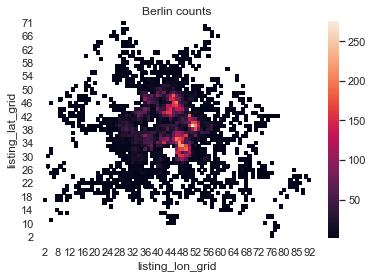

In [100]:
a=a.sort_index(axis=0, ascending=False)
ax1=sns.heatmap(a)
plt.yticks(rotation=0)
plt.xticks(rotation=0)

ax1.set_title("Berlin counts")
plt.show()

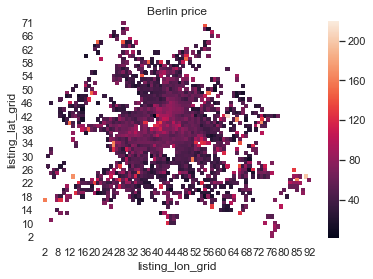

In [101]:
a = airbnb.pivot_table(index='listing_lat_grid', 
                    columns='listing_lon_grid', 
                    values='price', 
                    aggfunc='mean')

a=a.sort_index(axis=0, ascending=False)
ax1=sns.heatmap(a)
plt.yticks(rotation=0)
plt.xticks(rotation=0)

ax1.set_title("Berlin price")
plt.show()

In [102]:
#airbnb[airbnb['name']=='modern 3-bed flat near buckingham palace t5'][['lat', 'lng']]

In [133]:
#airbnb[airbnb['listing_lat_grid']==46][['name', 'listing_lon_grid']]

In [134]:
#airbnb.groupby('listing_lat_grid')['realSum'].mean().sort_values(ascending=False)